In [1]:
import json
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from textblob import TextBlob
import seaborn as sns
from pandas import *

from tqdm import tqdm
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yutingli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EDA

In [2]:
Chipotle = read_csv('Chipotle.csv')

In [3]:
#separate date and time
Chipotle['time']= Chipotle['date'].apply(lambda x: x.split()[1])
Chipotle['date']= Chipotle['date'].apply(lambda x: x.split()[0])
Chipotle['date'] = pd.to_datetime(Chipotle['date'])

In [4]:
Chipotle.head()

Unnamed: 0             business_id                    name       city  \
0       18966  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
1       18967  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
2       18968  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
3       18969  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
4       18970  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   

  state  stars_x  review_count  is_open                       categories  \
0    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
1    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
2    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
3    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
4    NV      3.5           115        1  Fast Food, Mexican, Restaurants   

                review_id                 user_id  stars_y  useful  funny  \
0  LCaef3e2Esy353kSeoD-xA  TQY1CtRrKuNJS4dSDLbjdw      1.0       1      0   
1  O1DR3RxBSgHboQet4aT9vg  iMhVuRE1QSGBFtOtE1L-jQ      4.0       0      0   
2  rCE67-CtkGecfutuJ0z3RQ  HQnfONrTQKBdHPV7iebtxQ      1.0      10      8   
3  5hD58ljY7uGKfCplgpzHhQ  Ac18yQ3QoawFCA12cVGDdA      1.0       2      0   
4  7VyI4y-1KdQBd6OyiLVD-Q  pk6IhhLRwJMJjvRnM_QvUQ      3.0       0      0   

   cool                                               text       date  \
0     0  I'm a regular at chipotle in California, this ... 2016-07-25   
1     0  The food tasted the same as Chipotle back in m... 2012-09-10   
2     9  This is seriously the WORST chipotle I have ev... 2017-05-13   
3     0  I am writing this based on my opinion before t... 2015-08-30   
4     0  Convienient location, relatively decent food b... 2011-07-28   

       time  
0  05:07:18  
1  15:44:21  
2  11:25:44  
3  17:43:12  
4  23:13:35

In [5]:
print("Number of Stores of Chipotle Mexican Grill: ",len(Chipotle["business_id"].value_counts()))
print("Number of Reviews of Chipotle Mexican Grill: ",len(Chipotle))

Number of Stores of Chipotle Mexican Grill:  183
Number of Reviews of Chipotle Mexican Grill:  9590


([], <a list of 0 Text xticklabel objects>)

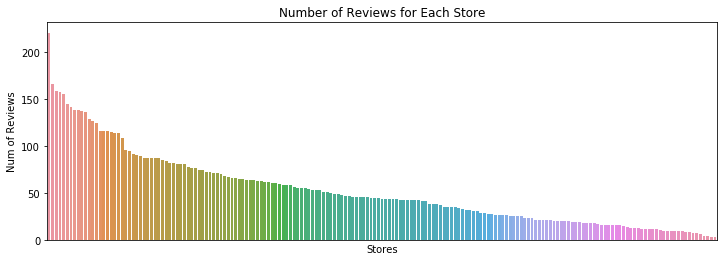

In [6]:
fig= plt.figure(figsize = (12,4))
sns.countplot(Chipotle["business_id"],order = Chipotle["business_id"].value_counts().index)
plt.title('Number of Reviews for Each Store')
plt.xlabel("Stores")
plt.ylabel("Num of Reviews")
plt.xticks([])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

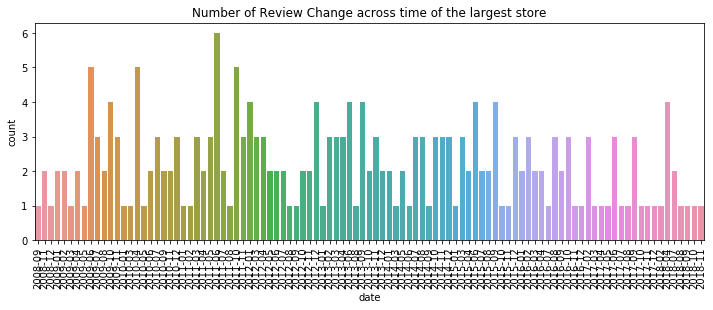

In [7]:
largest_store = Chipotle[Chipotle["business_id"] =="gOBxVkHpqtjRRxHBIrpnMA"]
year_month_large_store = list(largest_store['date'].dt.to_period('M'))
year_month_large_store.sort()
fig= plt.figure(figsize = (12,4))
sns.countplot(largest_store['date'].dt.to_period('M'), order = np.unique(year_month_large_store))
plt.title('Number of Review Change across time of the largest store')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

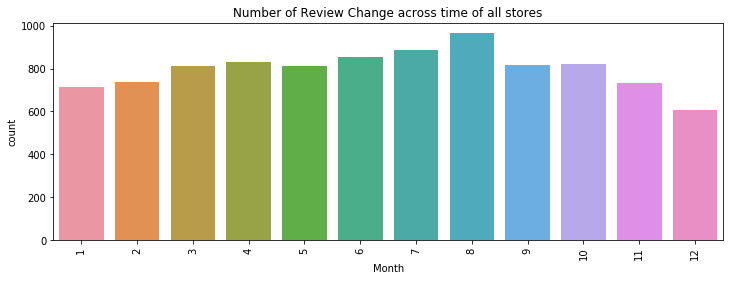

In [8]:
month = list(pd.DatetimeIndex(Chipotle['date']).month)
month.sort()
fig= plt.figure(figsize = (12,4))
sns.countplot(pd.DatetimeIndex(Chipotle['date']).month, order = np.unique(month))
plt.title('Number of Review Change across time of all stores')
plt.xlabel('Month')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

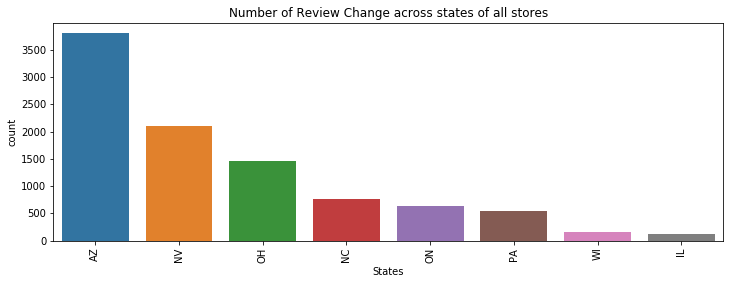

In [9]:
fig= plt.figure(figsize = (12,4))
sns.countplot(Chipotle['state'],order = Chipotle["state"].value_counts().index)
plt.title('Number of Review Change across states of all stores')
plt.xlabel('States')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

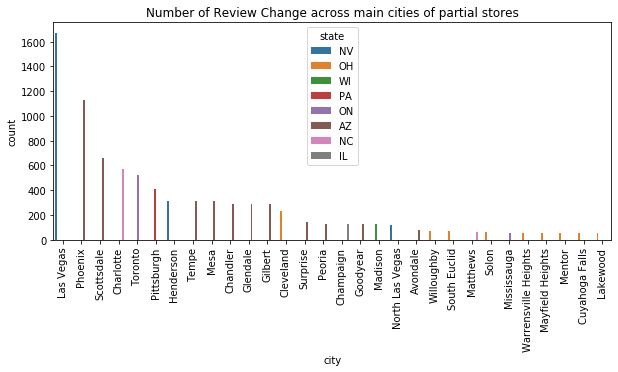

In [10]:
main_cities = list(Chipotle["city"].value_counts().index[0:30])
Chipotle_main_cities = Chipotle[Chipotle['city'].isin(main_cities)]

fig= plt.figure(figsize = (10,4))
sns.countplot(Chipotle_main_cities['city'],order = Chipotle_main_cities["city"].value_counts().index, hue = Chipotle_main_cities['state'])
plt.title('Number of Review Change across main cities of partial stores')
plt.xlabel('city')
plt.xticks(rotation = 90)

# Text Preprocessing

In [11]:
Chipotle['text'][0]

"I'm a regular at chipotle in California, this is my first visit to this chipotle on s.las Vegas strip.this is pretty new place I think, I took a veggie bowl in which the rice was undone and the fajitas were all burnt, the quantity offered was less than usual. I'm very unhappy with this place."

In [12]:
#decontraction
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"didn\'t", "did not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    phrase = re.sub(r"o\'clock", "clock", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)
    phrase = re.sub(r"that\'s", "that is", phrase)       
    phrase = re.sub(r"go-around", "go around", phrase)  
    # general
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    #phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
# return to words
Chipotle['review'] = Chipotle['text'].apply(lambda x: decontracted(x))

# to lower
Chipotle['review'] = Chipotle['review'].apply(lambda x: x.lower())
# remove stop words
stop_words = stopwords.words('english')
Chipotle['review'] = Chipotle['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# remove non-word and punctuations
rm_punc = re.compile(r"\W")
shrink_spaces = re.compile(r"\s+")
Chipotle['review'] = Chipotle['review'].apply(lambda x: rm_punc.sub(' ', x))
Chipotle['review'] = Chipotle['review'].apply(lambda x: shrink_spaces.sub(' ', x))

In [14]:
# # handle negation
# sub_nt = re.compile(r"n't")
# handle_not = re.compile(r"not (?=[a-zA-Z]+)")
# df['text'] = df['text'].apply(lambda x: sub_nt.sub(r' not', x))
# df['text'] = df['text'].apply(lambda x: handle_not.sub(r'not_', x))

In [15]:
nltk.download('wordnet')
# import these modules 
import nltk
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
# lemmantize
Chipotle['review'] = Chipotle['review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yutingli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
Chipotle['review'].iloc[0]

'regular chipotle california first visit chipotle s la vega strip this pretty new place think took veggie bowl rice undone fajitas burnt quantity offered le usual unhappy place'

# Sentiment Analysis

In [17]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [18]:
Chipotle['sentiment_socre'] = Chipotle['review'].apply(sentiment)

In [19]:
Chipotle.head()

Unnamed: 0             business_id                    name       city  \
0       18966  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
1       18967  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
2       18968  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
3       18969  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
4       18970  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   

  state  stars_x  review_count  is_open                       categories  \
0    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
1    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
2    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
3    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
4    NV      3.5           115        1  Fast Food, Mexican, Restaurants   

                review_id                 user_id  stars_y  useful  funny  \
0  LCaef3e2Esy353kSeoD-xA  TQY1CtRrKuNJS4dSDLbjdw      1.0       1      0   
1  O1DR3RxBSgHboQet4aT9vg  iMhVuRE1QSGBFtOtE1L-jQ      4.0       0      0   
2  rCE67-CtkGecfutuJ0z3RQ  HQnfONrTQKBdHPV7iebtxQ      1.0      10      8   
3  5hD58ljY7uGKfCplgpzHhQ  Ac18yQ3QoawFCA12cVGDdA      1.0       2      0   
4  7VyI4y-1KdQBd6OyiLVD-Q  pk6IhhLRwJMJjvRnM_QvUQ      3.0       0      0   

   cool                                               text       date  \
0     0  I'm a regular at chipotle in California, this ... 2016-07-25   
1     0  The food tasted the same as Chipotle back in m... 2012-09-10   
2     9  This is seriously the WORST chipotle I have ev... 2017-05-13   
3     0  I am writing this based on my opinion before t... 2015-08-30   
4     0  Convienient location, relatively decent food b... 2011-07-28   

       time                                             review  \
0  05:07:18  regular chipotle california first visit chipot...   
1  15:44:21  food tasted chipotle back home state consisten...   
2  11:25:44  seriously worst chipotle ever coming year must...   
3  17:43:12  writing based opinion illness outbreak locatio...   
4  23:13:35  convienient location relatively decent food bo...   

   sentiment_socre  
0        -0.035606  
1         0.224934  
2        -0.013686  
3         0.114062  
4         0.191667

In [20]:
Chipotle['sentiment'] = ''
Chipotle['sentiment'][Chipotle['sentiment_socre'] > 0] = 'positive'
Chipotle['sentiment'][Chipotle['sentiment_socre'] <= 0] = 'negative'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Review Sentiments')

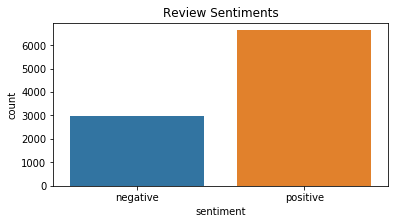

In [21]:
plt.figure(figsize=(6,3))
ax = sns.countplot(Chipotle['sentiment'])
plt.title('Review Sentiments')

### Collect Reviews and Count Words

In [22]:
review_list_ch = Chipotle['review'].tolist()
review_all_ch = ' '.join(review_list_ch)
word_list_ch = [word for word in review_all_ch.lower().split() if word not in STOPWORDS]
counted_words = collections.Counter(word_list_ch)
words = []
counts = []
for letter, count in counted_words.most_common(50):
    words.append(letter)
    counts.append(count)

### Calculate Word Occurence Ratio in Positive / Negative Reviews

In [23]:
pcount = []
ncount = []
for word in words:
    pcount.append(sum(Chipotle[Chipotle['sentiment'] == "positive"]["text"].str.contains(word)))
    ncount.append(sum(Chipotle[Chipotle['sentiment'] == "negative"]["text"].str.contains(word)))

In [24]:
pcount_normalized = np.asarray(pcount)/Chipotle.loc[Chipotle['sentiment'] == "positive"].shape[0]
ncount_normalized = np.asarray(ncount)/Chipotle.loc[Chipotle['sentiment'] == "negative"].shape[0]

In [25]:
word_pos_neg_cnt_df = pd.DataFrame({'positive ratio': pcount_normalized, 'negative ratio': ncount_normalized}, index=words)
word_pos_neg_cnt_df.head()

positive ratio  negative ratio
chipotle        0.175653        0.247221
food            0.505211        0.408218
location        0.368373        0.367127
burrito         0.293611        0.251937
time            0.366410        0.390030

# Time Series Sentiment Analysis

## Preliminary Analysis

### Take Stars vs Date

In [26]:
df_ch_star = Chipotle[['stars_y', 'date']]
df_ch_star.head()

stars_y       date
0      1.0 2016-07-25
1      4.0 2012-09-10
2      1.0 2017-05-13
3      1.0 2015-08-30
4      3.0 2011-07-28

### Convert to Monthly Change

In [27]:
ch_star_monthly_change = df_ch_star.set_index('date').resample('M').stars_y.mean()
ch_star_monthly_change = ch_star_monthly_change.dropna()
ch_star_monthly_change.head()
# df_ch.set_index('date').groupby('sentiment').get_group('positive').resample('M').count().sentiment

date
2005-11-30    3.0
2005-12-31    4.0
2006-01-31    5.0
2006-05-31    3.0
2006-06-30    5.0
Name: stars_y, dtype: float64

### Stars vs Month

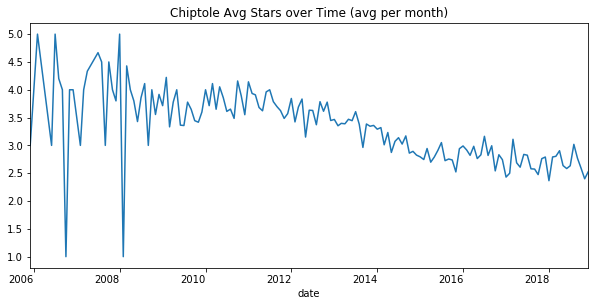

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# ch_star_monthly_change = df_ch_star_vs_date.groupby(pd.Grouper(freq='30D', base=0, label='right')).mean()
ch_star_monthly_change.plot.line(label='Stars', ax=ax, rot=0, figsize=(10, 5), title="Chiptole Avg Stars over Time (avg per month)")

### Total positive / negative reviews per month

In [29]:
# monthly total positive rows
Chipotle_pos_cnt = Chipotle.set_index('date').groupby('sentiment').get_group('positive').resample('M').count().sentiment
Chipotle_neg_cnt = Chipotle.set_index('date').groupby('sentiment').get_group('negative').resample('M').count().sentiment
print(Chipotle_pos_cnt.head())
print()
print(Chipotle_neg_cnt.head())

date
2005-11-30    2
2005-12-31    1
2006-01-31    1
2006-02-28    0
2006-03-31    0
Freq: M, Name: sentiment, dtype: int64

date
2006-05-31    1
2006-06-30    0
2006-07-31    0
2006-08-31    0
2006-09-30    0
Freq: M, Name: sentiment, dtype: int64


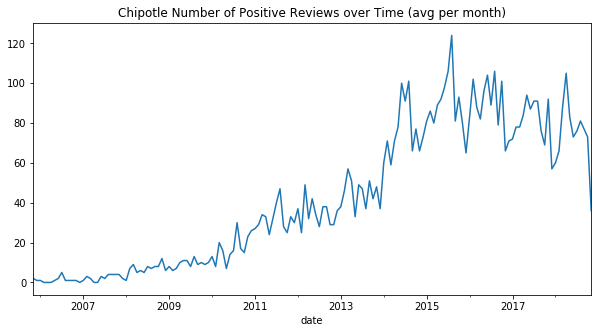

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
Chipotle_pos_cnt.plot.line(label='Number of Positive Reviews', ax=ax, rot=0, figsize=(10, 5), title="Chipotle Number of Positive Reviews over Time (avg per month)", style='-')

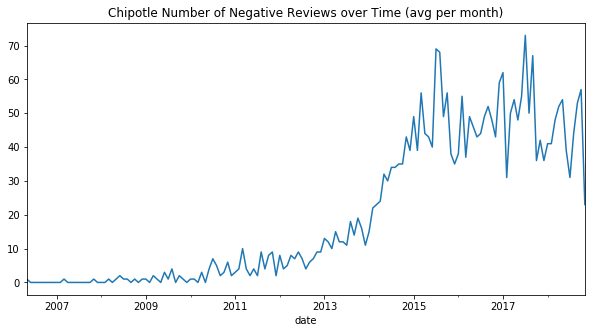

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
Chipotle_neg_cnt.plot.line(label='Number of Negative Reviews', ax=ax, rot=0, figsize=(10, 5), title="Chipotle Number of Negative Reviews over Time (avg per month)", style='-')

## Occurence of top frequent word in positive / negative reviews per month: step by step

### Pick a word as example

In [32]:
# current woi (word of interest)
idx = 1
words[idx]

'food'

### All reviews containing keyword

In [33]:
woi = words[1]
Chipotle_woi = Chipotle.loc[Chipotle['text'].str.contains(woi)]
Chipotle_woi.head()

Unnamed: 0             business_id                    name       city  \
1       18967  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
2       18968  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
3       18969  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
4       18970  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   
5       18971  dusNIzdCaH6EoLl2hRy6cQ  Chipotle Mexican Grill  Las Vegas   

  state  stars_x  review_count  is_open                       categories  \
1    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
2    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
3    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
4    NV      3.5           115        1  Fast Food, Mexican, Restaurants   
5    NV      3.5           115        1  Fast Food, Mexican, Restaurants   

                review_id  ... stars_y  useful  funny  cool  \
1  O1DR3RxBSgHboQet4aT9vg  ...     4.0       0      0     0   
2  rCE67-CtkGecfutuJ0z3RQ  ...     1.0      10      8     9   
3  5hD58ljY7uGKfCplgpzHhQ  ...     1.0       2      0     0   
4  7VyI4y-1KdQBd6OyiLVD-Q  ...     3.0       0      0     0   
5  VtNvWLQMgAh_1vX-XOCymg  ...     1.0       4      3     0   

                                                text       date      time  \
1  The food tasted the same as Chipotle back in m... 2012-09-10  15:44:21   
2  This is seriously the WORST chipotle I have ev... 2017-05-13  11:25:44   
3  I am writing this based on my opinion before t... 2015-08-30  17:43:12   
4  Convienient location, relatively decent food b... 2011-07-28  23:13:35   
5  This dump does not even deserve 1 star! I was ... 2010-11-23  17:09:04   

                                              review sentiment_socre  \
1  food tasted chipotle back home state consisten...        0.224934   
2  seriously worst chipotle ever coming year must...       -0.013686   
3  writing based opinion illness outbreak locatio...        0.114062   
4  convienient location relatively decent food bo...        0.191667   
5  dump even deserve 1 star looking forward secon...       -0.013185   

   sentiment  
1   positive  
2   negative  
3   positive  
4   positive  
5   negative  

[5 rows x 21 columns]

### Positive / negative reviews containing keyword

In [34]:
Chipotle_woi_pos_cnt = Chipotle_woi.set_index('date').groupby('sentiment').get_group('positive').resample('M').count().sentiment
Chipotle_woi_neg_cnt = Chipotle_woi.set_index('date').groupby('sentiment').get_group('negative').resample('M').count().sentiment
print(Chipotle_woi_pos_cnt.head())
print()
print(Chipotle_woi_neg_cnt.head())

date
2006-01-31    1
2006-02-28    0
2006-03-31    0
2006-04-30    0
2006-05-31    0
Freq: M, Name: sentiment, dtype: int64

date
2006-05-31    1
2006-06-30    0
2006-07-31    0
2006-08-31    0
2006-09-30    0
Freq: M, Name: sentiment, dtype: int64


### Occurence ratio in positive reviews and plot

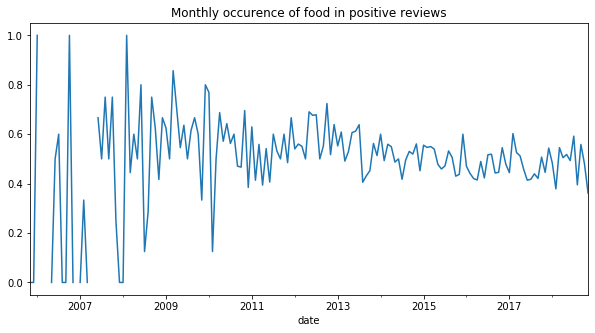

In [35]:
Chipotle_woi_pos_ratio = Chipotle_woi_pos_cnt.divide(Chipotle_pos_cnt, fill_value=0.0)
Chipotle_woi_pos_ratio.plot.line(rot=0, figsize=(10, 5), title="Monthly occurence of {} in positive reviews".format(woi))

#### Occurence ratio in negative reviews and plot

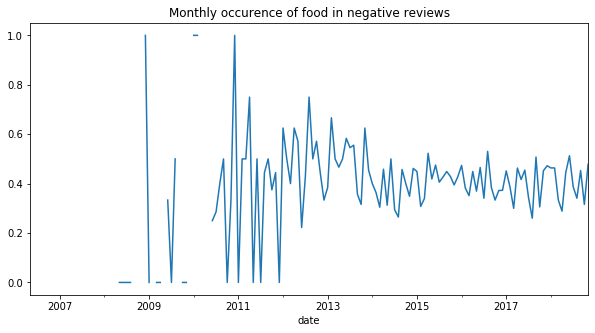

In [36]:
Chipotle_woi_neg_ratio = Chipotle_woi_neg_cnt.divide(Chipotle_neg_cnt, fill_value=0.0)
Chipotle_woi_neg_ratio.plot.line(rot=0, figsize=(10, 5), title="Monthly occurence of {} in negative reviews".format(woi))

# Examine All Frequent Words

In [37]:
def GetStarsInDateRange(x, start, end, colname):
    x_df = x.to_frame().reset_index('date')
    return x_df.loc[(x_df['date'] >= start) & (x_df['date'] <= end)].set_index('date')[colname]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


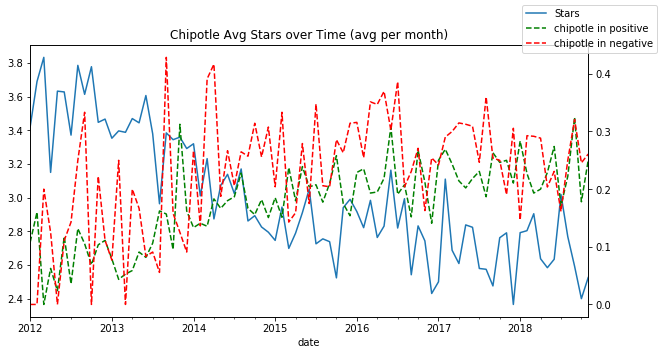

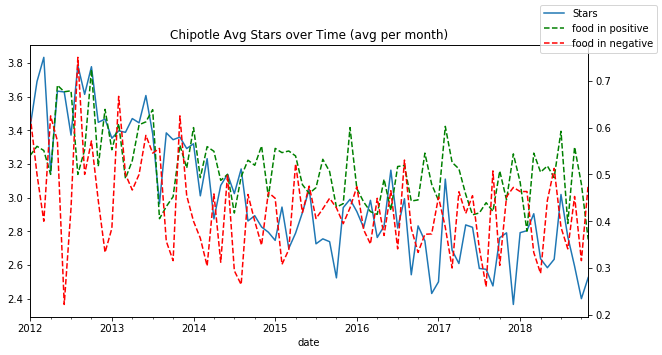

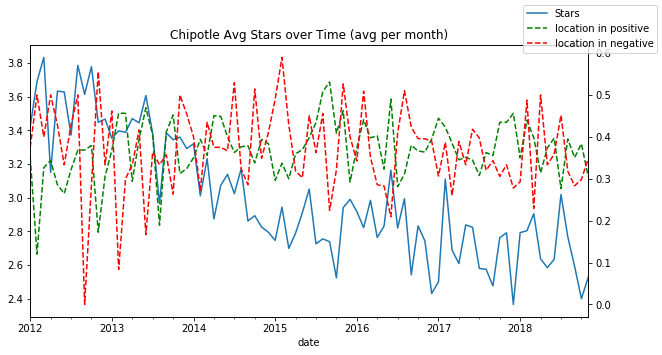

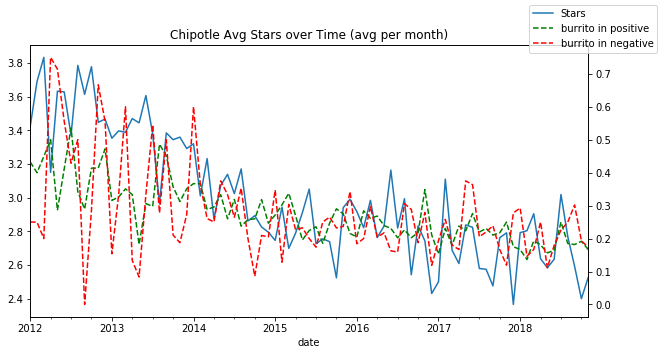

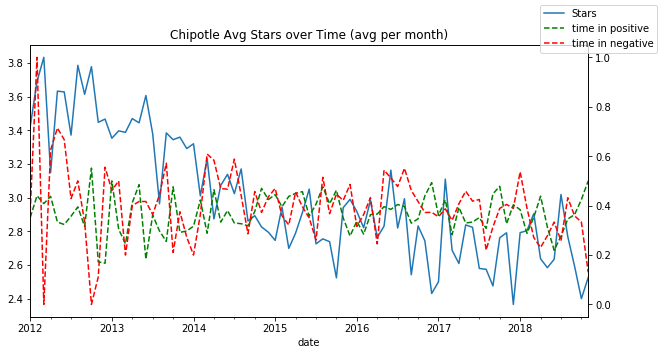

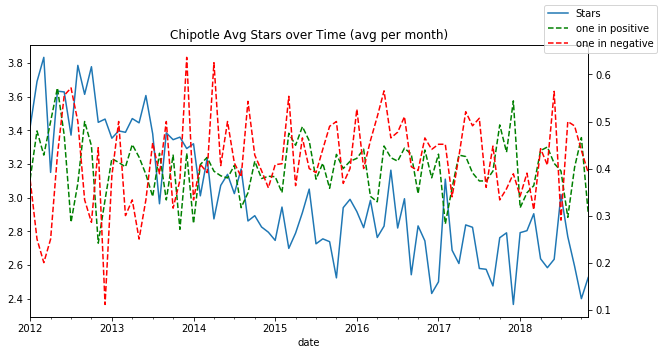

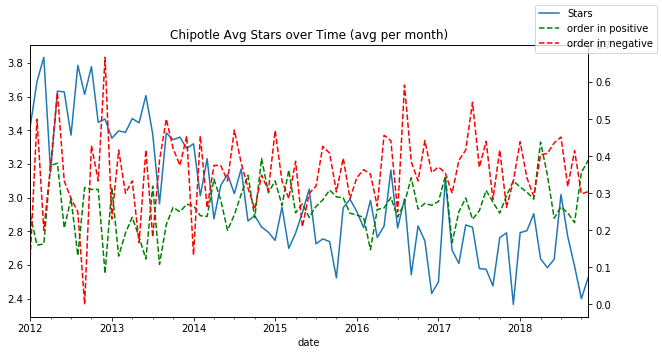

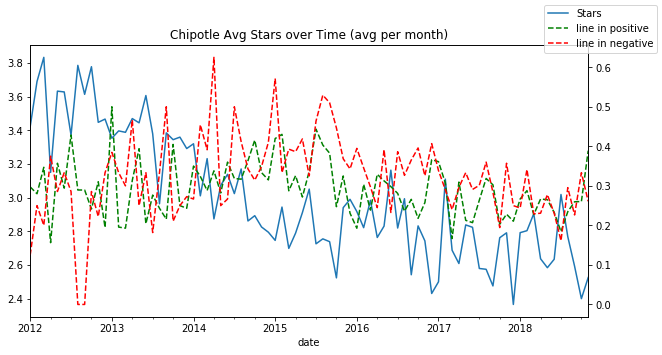

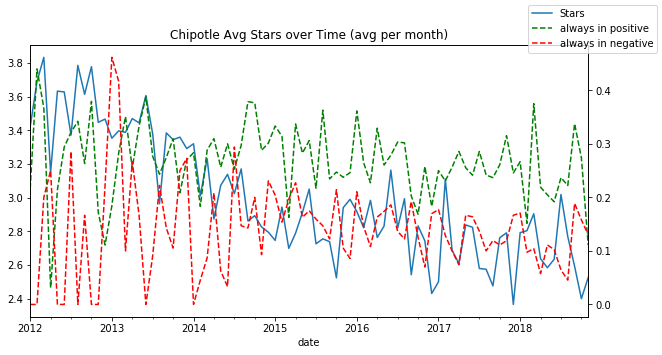

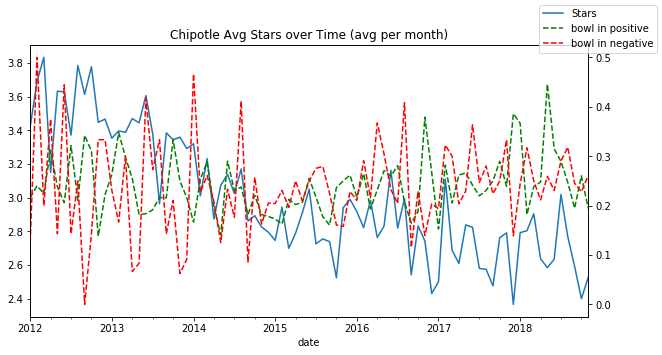

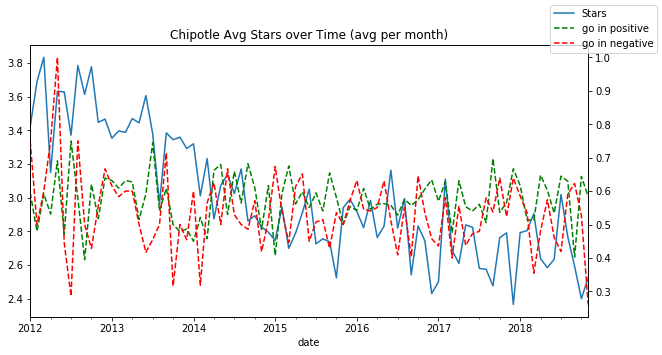

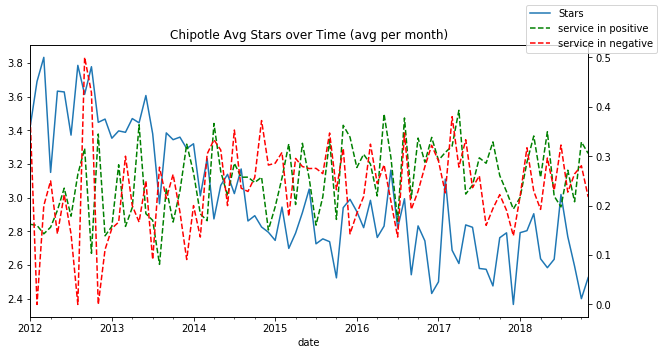

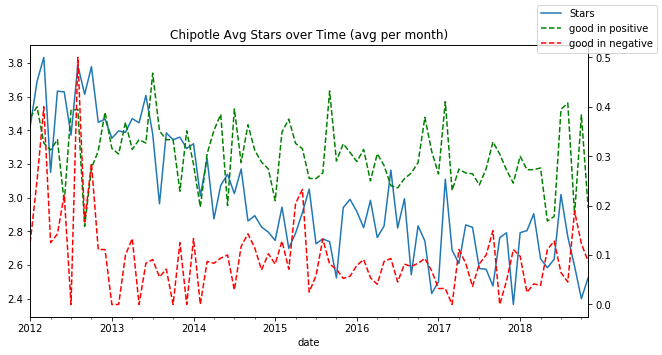

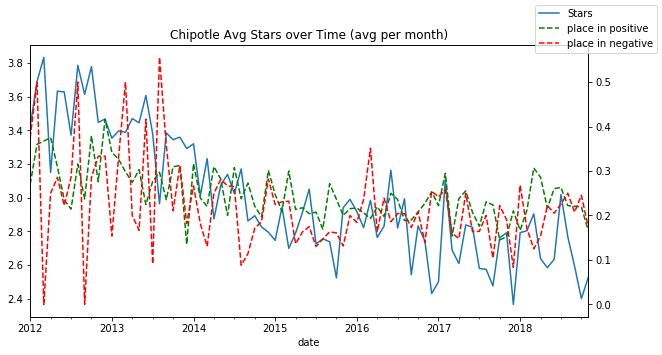

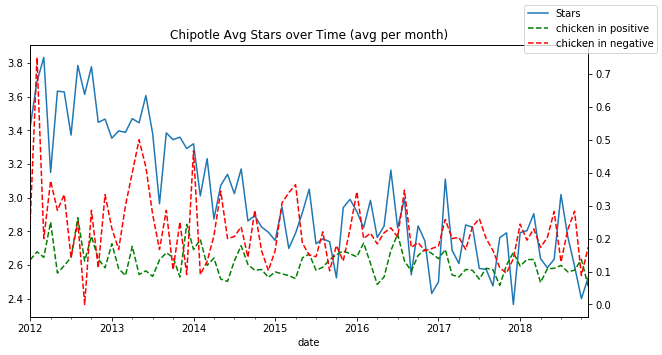

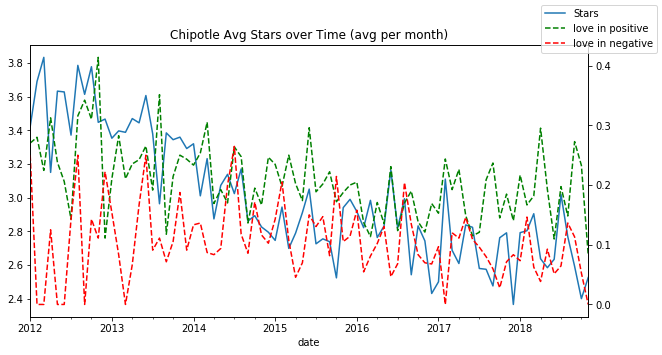

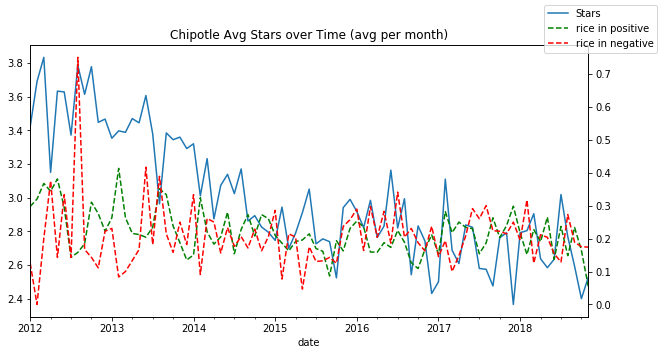

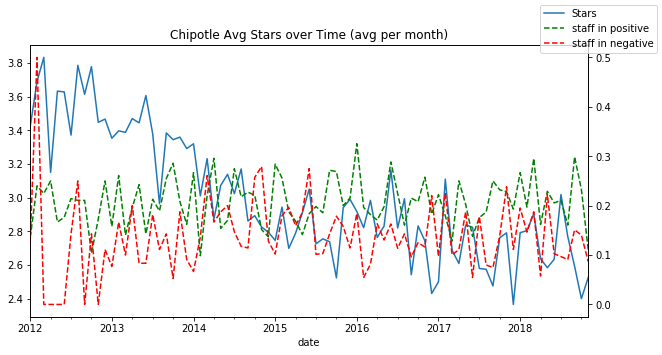

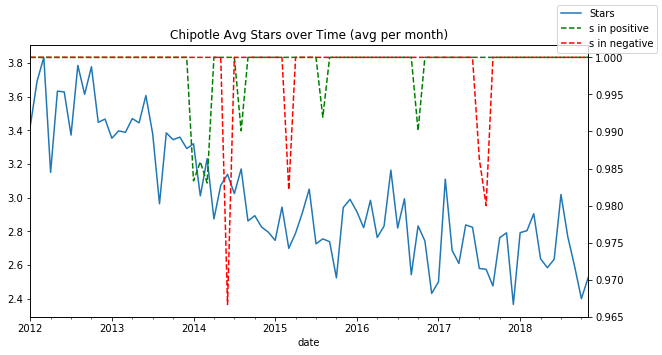

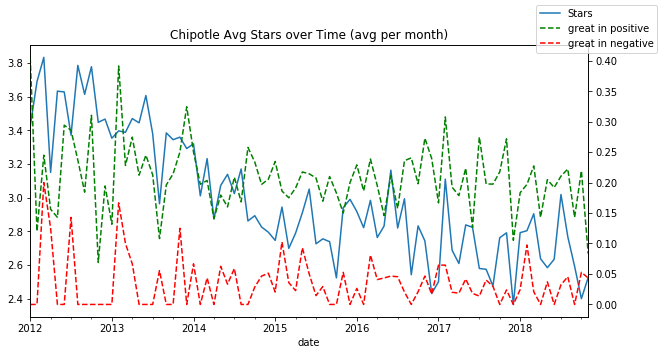

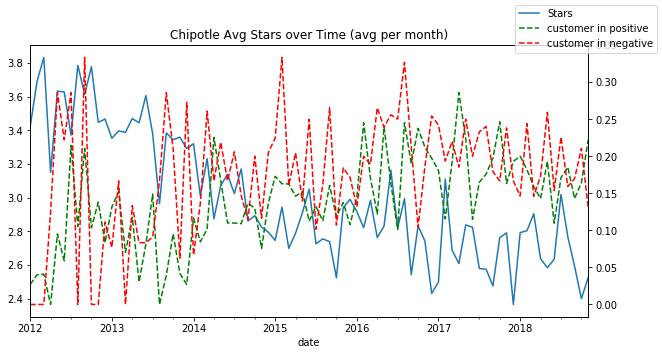

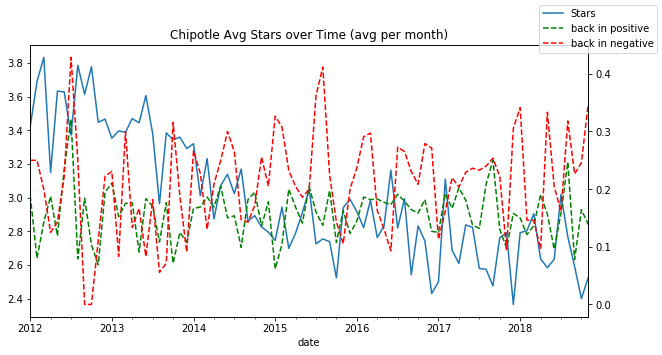

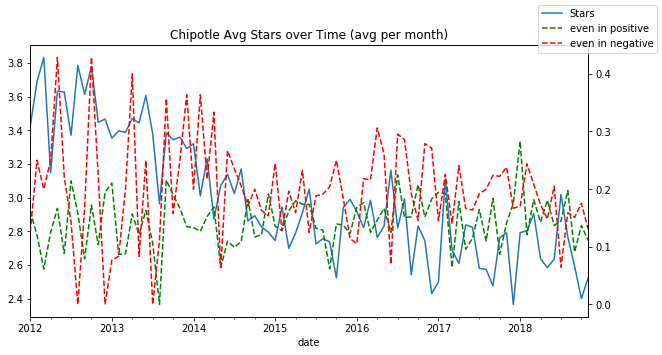

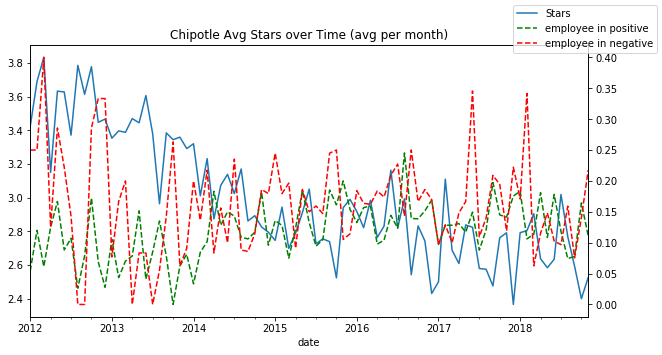

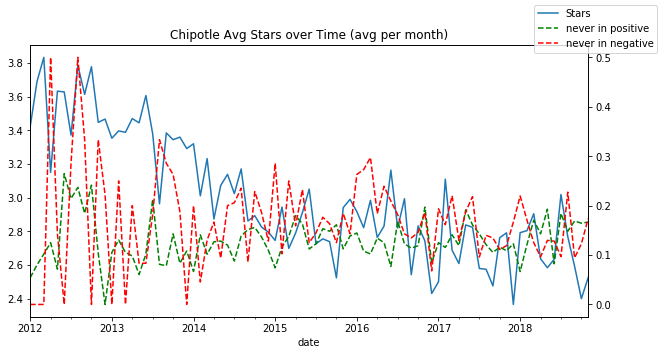

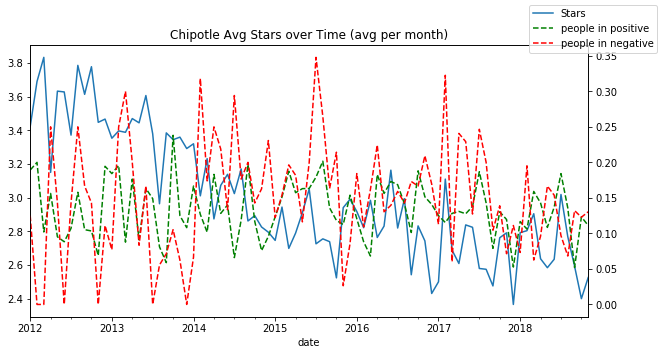

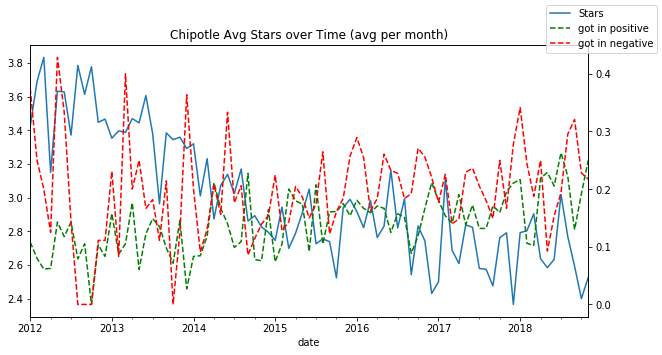

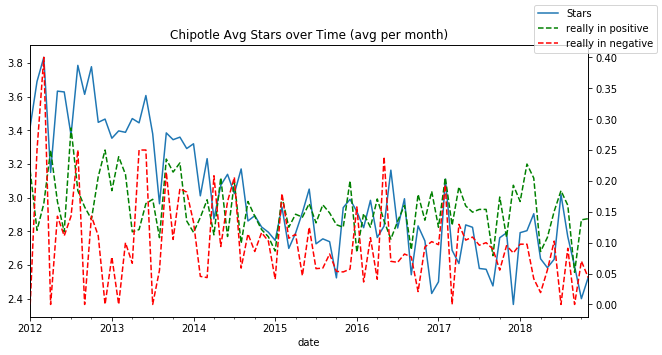

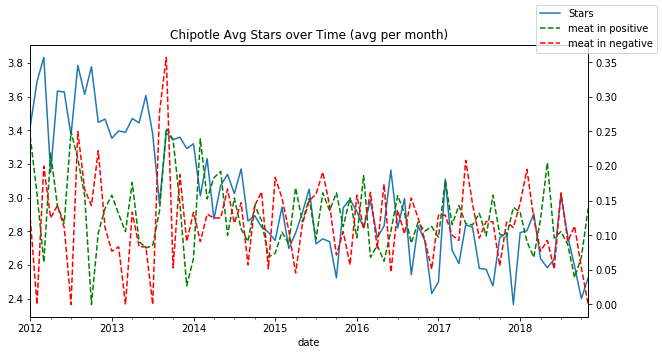

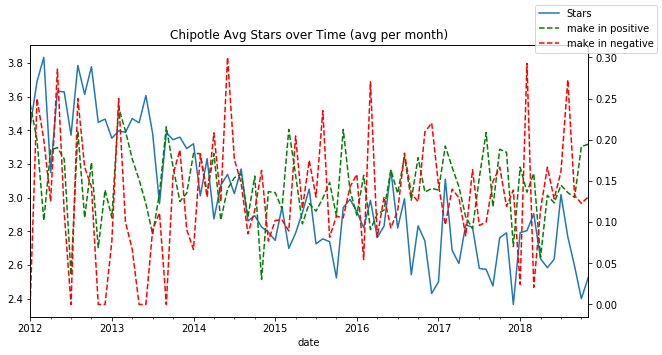

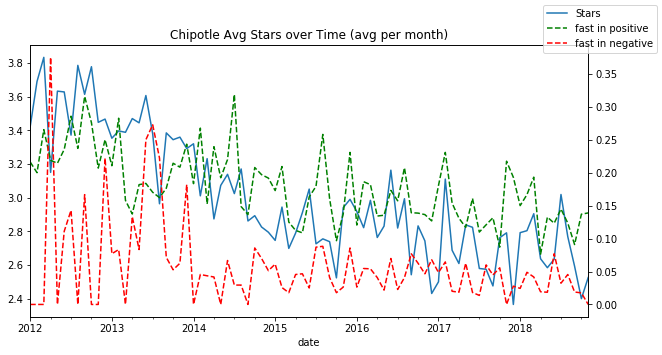

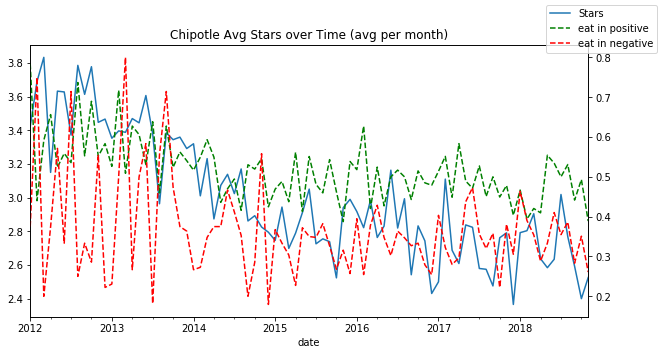

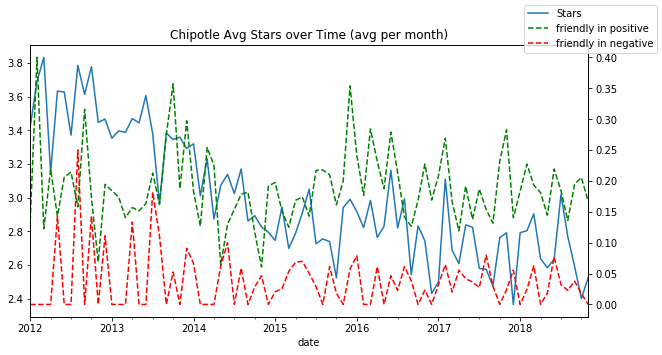

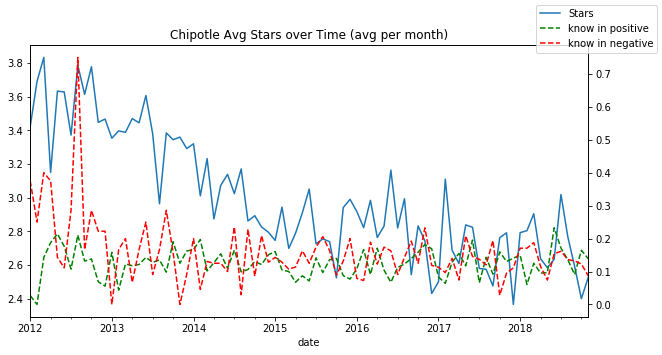

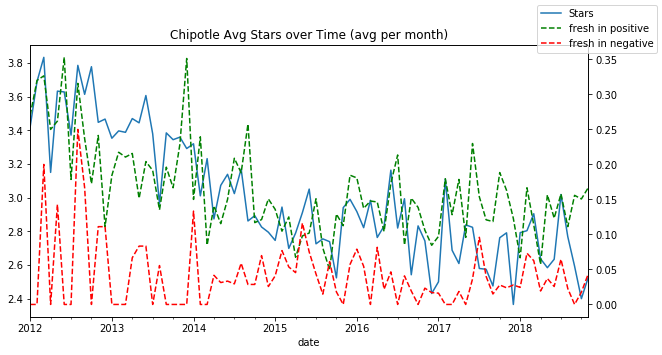

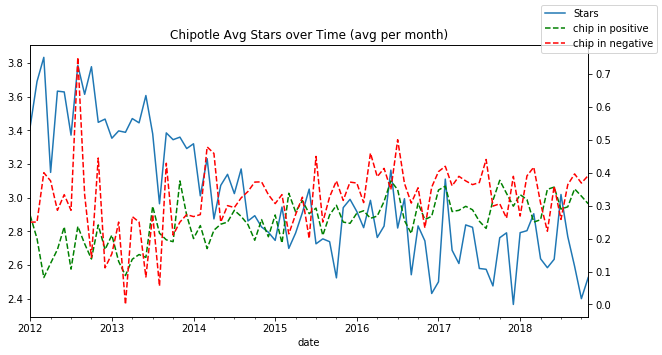

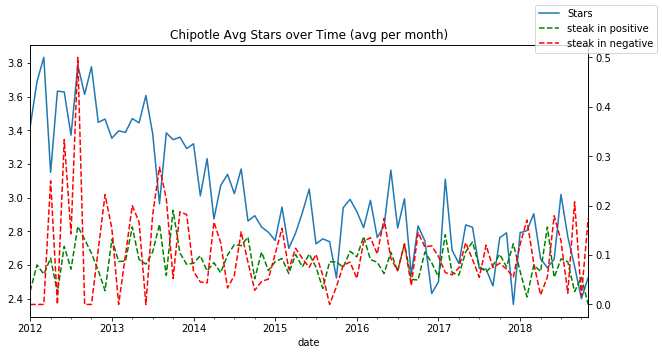

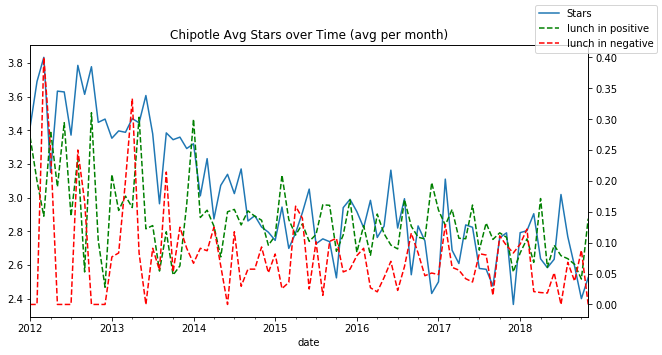

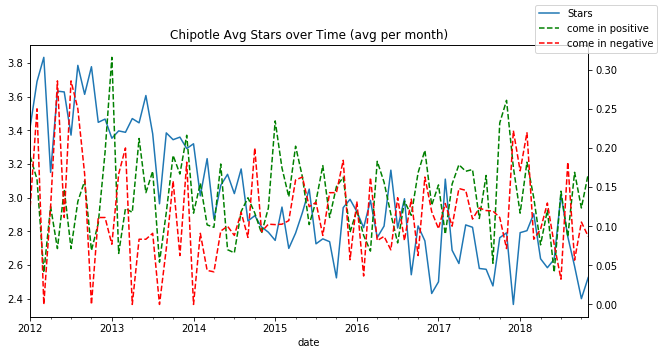

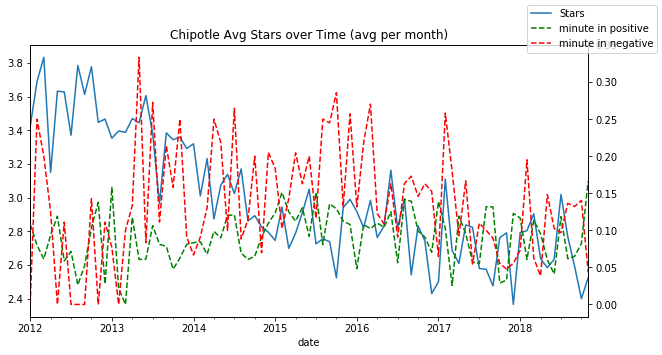

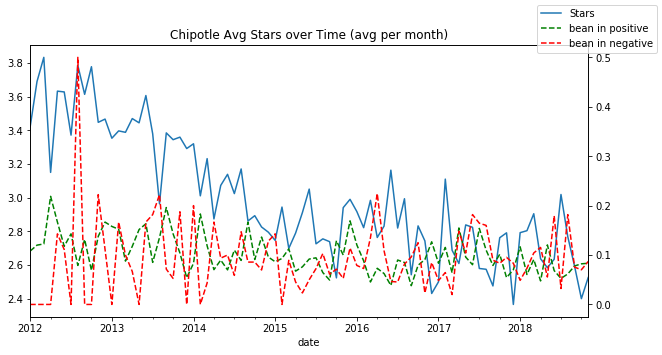

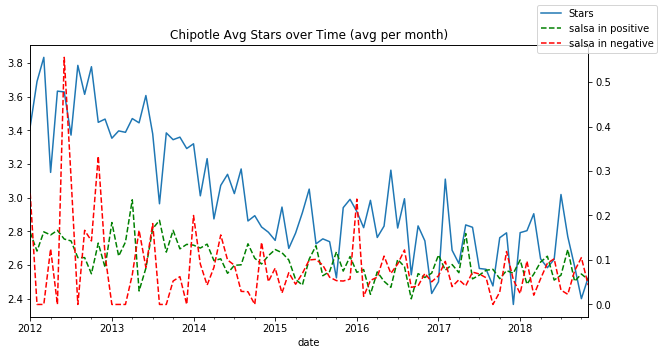

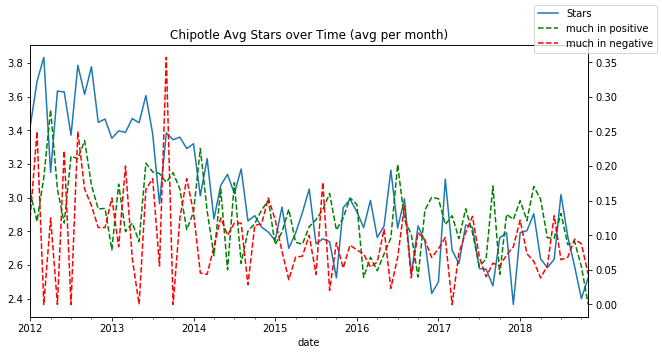

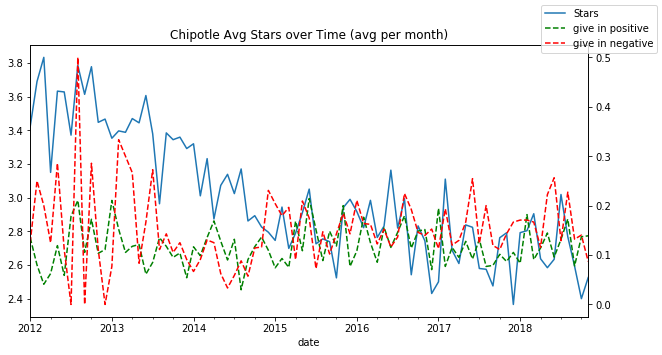

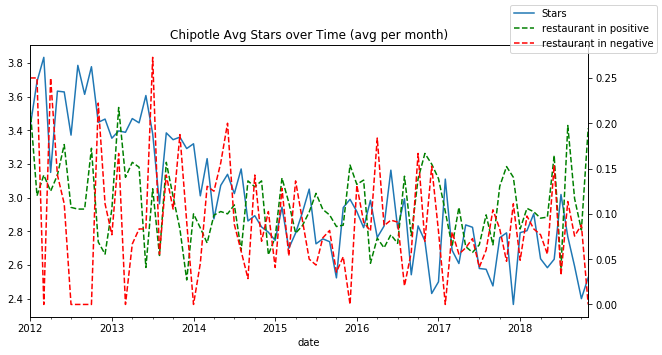

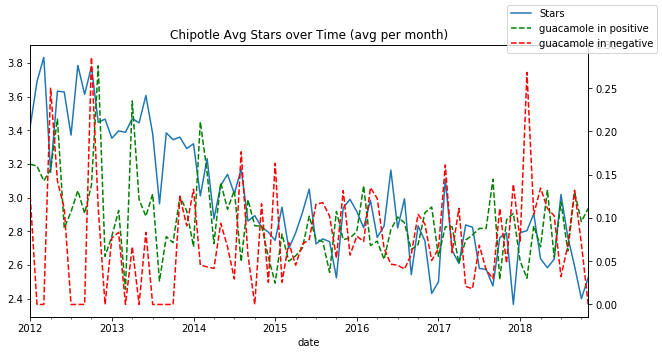

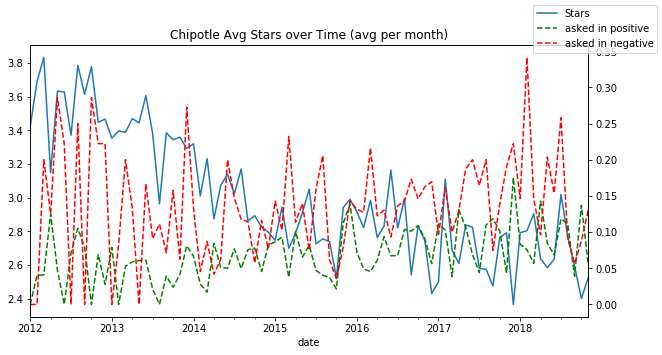

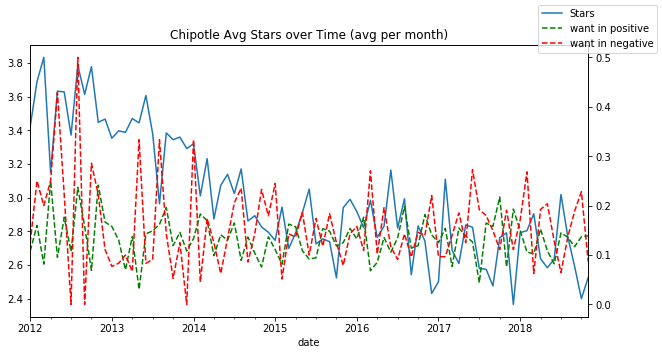

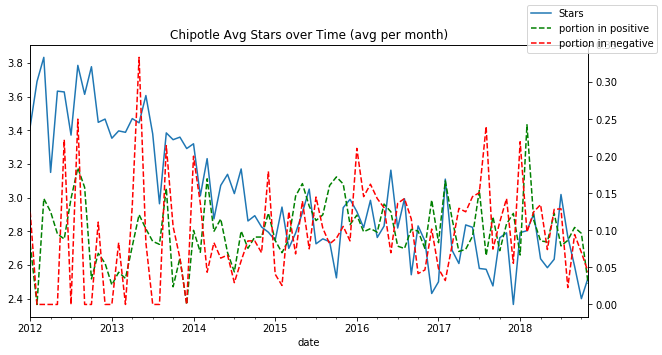

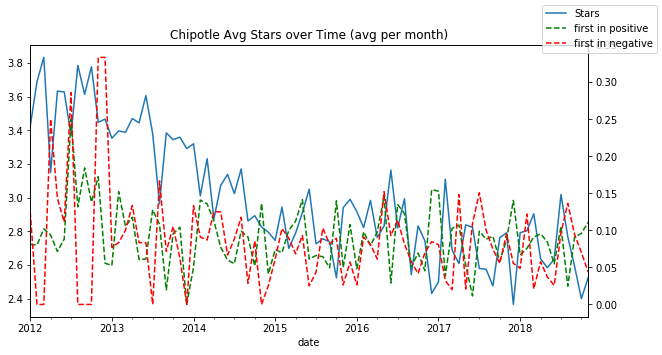

In [38]:
start_date = '2012-01-01'
end_date = '2018-12-31'

for woi in words:
    Chipotle_woi = Chipotle.loc[Chipotle['text'].str.contains(woi)]
    Chipotle_woi.head()
    Chipotle_woi_pos_cnt = Chipotle_woi.set_index('date').groupby('sentiment').get_group('positive').resample('M').count().sentiment
    Chipotle_woi_neg_cnt = Chipotle_woi.set_index('date').groupby('sentiment').get_group('negative').resample('M').count().sentiment

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    stars_plot = GetStarsInDateRange(ch_star_monthly_change, start_date, end_date, 'stars_y')
    stars_plot.plot.line(label='Stars', ax=ax, rot=0, figsize=(10, 5), title="Chipotle Avg Stars over Time (avg per month)", style='-')
    ax_r = ax.twinx()

    Chipotle_woi_pos_ratio = Chipotle_woi_pos_cnt.divide(Chipotle_pos_cnt, fill_value=0.0)
    Chipotle_woi_pos_ratio = Chipotle_woi_pos_ratio.dropna()
    woi_pos_ratio_plot = GetStarsInDateRange(Chipotle_woi_pos_ratio, start_date, end_date, 'sentiment')
    woi_pos_ratio_plot.plot.line(label='{} in positive'.format(woi), ax=ax_r, rot=0, style='g--')

    Chipotle_woi_neg_ratio = Chipotle_woi_neg_cnt.divide(Chipotle_neg_cnt, fill_value=0.0)
    Chipotle_woi_neg_ratio = Chipotle_woi_neg_ratio.dropna()
    woi_neg_ratio_plot = GetStarsInDateRange(Chipotle_woi_neg_ratio, start_date, end_date, 'sentiment')
    woi_neg_ratio_plot.plot.line(label='{} in negative'.format(woi), ax=ax_r, rot=0, style='r--')

    fig.legend()

In [39]:
words

['chipotle',
 'food',
 'location',
 'burrito',
 'time',
 'one',
 'order',
 'line',
 'always',
 'bowl',
 'go',
 'service',
 'good',
 'place',
 'chicken',
 'love',
 'rice',
 'staff',
 's',
 'great',
 'customer',
 'back',
 'even',
 'employee',
 'never',
 'people',
 'got',
 'really',
 'meat',
 'make',
 'fast',
 'eat',
 'friendly',
 'know',
 'fresh',
 'chip',
 'steak',
 'lunch',
 'come',
 'minute',
 'bean',
 'salsa',
 'much',
 'give',
 'restaurant',
 'guacamole',
 'asked',
 'want',
 'portion',
 'first']

In [ ]:
start_date = '2012-01-01'
end_date = '2018-12-31'

woi = "burrito"
Chipotle_woi = Chipotle.loc[Chipotle['text'].str.contains(woi)]
Chipotle_woi.head()
Chipotle_woi_pos_cnt = Chipotle_woi.set_index('date').groupby('sentiment').get_group('positive').resample('M').count().sentiment
Chipotle_woi_neg_cnt = Chipotle_woi.set_index('date').groupby('sentiment').get_group('negative').resample('M').count().sentiment

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
stars_plot = GetStarsInDateRange(ch_star_monthly_change, start_date, end_date, 'stars_y')
stars_plot.plot.line(label='Stars', ax=ax, rot=0, figsize=(10, 5), title="Chipotle Avg Stars over Time (avg per month)", style='-')
ax_r = ax.twinx()

Chipotle_woi_pos_ratio = Chipotle_woi_pos_cnt.divide(Chipotle_pos_cnt, fill_value=0.0)
Chipotle_woi_pos_ratio = Chipotle_woi_pos_ratio.dropna()
woi_pos_ratio_plot = GetStarsInDateRange(Chipotle_woi_pos_ratio, start_date, end_date, 'sentiment')
woi_pos_ratio_plot.plot.line(label='{} in positive'.format(woi), ax=ax_r, rot=0, style='g--')
fig.legend()

# Topic Modeling

In [ ]:
# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Chipotle['review']))

In [ ]:
#Stemming
wnl = stem.WordNetLemmatizer()
data_words = [[wnl.lemmatize(word) for word in sentence] for sentence in data_words]

In [ ]:
#create bag-of-words for each narrative
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])
print(bigram_mod[data_words[0]])

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])

## find the optimal number of topics for LDA

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=101)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

        
        

    return model_list, coherence_values

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, 
                                                 corpus=corpus, 
                                                 num_topics=num_topics, 
                                                 id2word=id2word,
                                                 random_seed=101)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
       lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=5, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True) 
        
        

    return model_list, coherence_values
                                                   
# Can take a long time to run.
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=1)

In [ ]:
# Can take a long time to run.
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=1)

In [ ]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

## Finding topics Using LDA model

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=101,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

- Explanation for Perplexity:Perplexity is a measurement of how well a probability model predicts a test data.
- Low perplexity is good and high perplexity is bad since the perplexity is the exponentiation of the entropy (a measure of uncertainty or randomness).

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [ ]:
# pyLDAvis.save_html(vis, 'lda.html')

## Finding topics Using optimal LDA model

In [ ]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
# # Compute Perplexity
# print('\nPerplexity: ', optimal_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=optimal_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

# Try

In [ ]:
num_of_topics= [1,2,3,4,5,6,7,8,9,10,11,12]

# Build LDA model
def find_n_of_topics(x):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=x, 
                                               random_state=101,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    return(CoherenceModel(model=lda_model, 
                          texts=data_lemmatized, 
                          dictionary=id2word, 
                          coherence='c_v').get_coherence())

coherence_num_of_topics = [num_of_topics.apply(lambda x: find_n_of_topics(x))]

In [ ]:
num_of_topics= [1,2,3,4,5,6,7,8,9,10,11,12]
coherence_num_of_topics = list()
# Build LDA model
for n in num_of_topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics= n, 
                                               random_state=101,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    coherence_num_of_topics.append(CoherenceModel(model=lda_model, 
                          texts=data_lemmatized, 
                          dictionary=id2word, 
                          coherence='c_v').get_coherence())

In [ ]:
# Show graph
plt.plot(num_of_topics, coherence_num_of_topics)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(num_of_topics, coherence_num_of_topics):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 3, 
                                           random_state=101,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

# Action Items:
- 调参，增加topic个数
- 删去不重要的词
- 好的topic 不好的topic based on sentiment analysis